In [121]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# Read your football data
data = pd.read_csv('/Users/mrrobot/Downloads/bayern_matches.csv', delimiter=';')
print(data.head(6))

                date                                            players  \
0     March 10, 2024  Lukas Hradecky, Jonathan Tah, Piero Hincapié, ...   
1      March 3, 2024  Lukas Hradecky, Jonathan Tah, Piero Hincapié, ...   
2  February 23, 2024  Lukas Hradecky, Jonathan Tah, Edmond Tapsoba, ...   
3  February 17, 2024  Lukas Hradecky, Jonathan Tah, Piero Hincapié, ...   
4  February 10, 2024  Lukas Hradecky, Jonathan Tah, Piero Hincapié, ...   
5   February 3, 2024  Lukas Hradecky, Jonathan Tah, Piero Hincapié, ...   

  result score  
0    win   2-0  
1    win   2-0  
2    win   2-1  
3    win   2-1  
4    win   3-0  
5    win   2-0  


In [122]:
def preprocess_data(data):
    # Split the "players" column into individual player names
    players = data["players"].str.split(", ")

    # Combine the players with the original DataFrame
    data["players"] = players  # Add the players back as a column

    # Handle missing values (if any)
    data.fillna("0", inplace=True)  # Replace NaN values with "0" (assuming no player participated)

    # print(data.head())  # Print DataFrame head after preprocessing
    return data

# Preprocess the data
data = preprocess_data(data.copy())
print(data.head())

                date                                            players  \
0     March 10, 2024  [Lukas Hradecky, Jonathan Tah, Piero Hincapié,...   
1      March 3, 2024  [Lukas Hradecky, Jonathan Tah, Piero Hincapié,...   
2  February 23, 2024  [Lukas Hradecky, Jonathan Tah, Edmond Tapsoba,...   
3  February 17, 2024  [Lukas Hradecky, Jonathan Tah, Piero Hincapié,...   
4  February 10, 2024  [Lukas Hradecky, Jonathan Tah, Piero Hincapié,...   

  result score  
0    win   2-0  
1    win   2-0  
2    win   2-1  
3    win   2-1  
4    win   3-0  


In [123]:
def transform_data(data):
    transactions = []
    for _, row in data.iterrows():
        player_list = [player for player in row["players"]]  # Use the "players" column directly
        transactions.append(player_list)
    return transactions
# Transform the data for Apriori
transactions = transform_data(data.copy())
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)
# Print the one-hot encoded DataFrame
# One-Hot Encoded DataFrame:
print(onehot_df.head())

   Adam Hlozek  Alejandro Grimaldo  Amine Adli  Borja Iglesias  \
0        False                True       False           False   
1        False                True       False           False   
2        False                True        True           False   
3        False                True        True           False   
4        False                True        True           False   

   Edmond Tapsoba  Exequiel Palacios  Florian Wirtz  Florian Wirtz   \
0            True               True           True           False   
1           False              False           True           False   
2            True              False           True           False   
3           False              False           True           False   
4            True              False           True           False   

   Granit Xhaka  Granit Xhaka Robert Andrich  ...  Lukas Hradecky  \
0          True                        False  ...            True   
1          True                       

In [128]:
# Minimum support threshod
min_support = 0.6
# Find frequent itemsets using Apriori
frequent_itemsets = apriori(onehot_df, min_support=min_support, use_colnames=True)

# Display the all the frequent itemsets
# Print the frequent itemsets with meaningful formatting
# print("Frequent Player Combinations and Their Support:")
# for i, row in frequent_itemsets.iterrows():
#     player_set = ', '.join(row['itemsets'])  # Join player names with commas
#     support = row['support']
#     print(f"- Players: {player_set} | Support: {support:.2f}")  # Format support with 2 decimal places

print("Frequent Player Combinations of 11 Players and Their Support:")
# Sort frequent itemsets by support in ascending order
frequent_itemsets_sorted = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == 11].sort_values(by='support')

for i, row in frequent_itemsets_sorted.iterrows():
    player_set = row['itemsets']
    player_set_str = ', '.join(player_set)  # Join player names with commas
    support = row['support']
    print(f"- Players: {player_set_str} | Support: {support:.2f}")

Frequent Player Combinations of 11 Players and Their Support:


In [129]:
# Filter out players based on their positions (you may need additional information about player positions)
goalkeepers = ['Matej Kovar', 'Lukas Hradecky']
defensive_players = ['Jonathan Tah', 'Piero Hincapié', 'Edmond Tapsoba', 'Odilon Kossounou', 'Granit Xhaka', 'Alejandro Grimaldo', 'Jeremie Frimpong']
midfielders = ['Granit Xhaka', 'Robert Andrich', 'Josip Stanisic', 'Amine Adli', 'Florian Wirtz', 'Jonas Hofmann']
strikers = ['Patrik Schick', 'Nathan Tella', 'Adam Hlozek', 'Borja Iglesias']

# Find the frequent itemsets containing players in different positions
goalkeeper_combinations = []
defensive_combinations = []
midfielder_combinations = []
striker_combinations = []

for _, row in frequent_itemsets.iterrows():
    player_set = row['itemsets']
    if all(player in goalkeepers for player in player_set) and len(player_set) == 1:
        goalkeeper_combinations.append((player_set, row['support']))
    if all(player in defensive_players for player in player_set) and len(player_set) == 5:
        defensive_combinations.append((player_set, row['support']))
    if all(player in midfielders for player in player_set) and len(player_set) == 3:
        midfielder_combinations.append((player_set, row['support']))
    if all(player in strikers for player in player_set) and len(player_set) == 2:
        striker_combinations.append((player_set, row['support']))

# Sort combinations by support
goalkeeper_combinations.sort(key=lambda x: x[1], reverse=True)
defensive_combinations.sort(key=lambda x: x[1], reverse=True)
midfielder_combinations.sort(key=lambda x: x[1], reverse=True)
striker_combinations.sort(key=lambda x: x[1], reverse=True)

# Print the best goalkeeper, defensive set, midfielders, and strikers
print("Best Goalkeeper:")
for combination, support in goalkeeper_combinations[:1]:
    player_set_str = ', '.join(combination)
    print(f"- Player: {player_set_str} | Support: {support:.2f}")

print("\nBest Defensive Combination of 5 Players:")
for combination, support in defensive_combinations[:1]:
    player_set_str = ', '.join(combination)
    print(f"- Players: {player_set_str} | Support: {support:.2f}")

print("\nBest Midfielder Combination of 3 Players:")
for combination, support in midfielder_combinations[:1]:
    player_set_str = ', '.join(combination)
    print(f"- Players: {player_set_str} | Support: {support:.2f}")

print("\nBest Striker Combination of 2 Players:")
for combination, support in striker_combinations[:1]:
    player_set_str = ', '.join(combination)
    print(f"- Players: {player_set_str} | Support: {support:.2f}")

Best Goalkeeper:
- Player: Lukas Hradecky | Support: 0.91

Best Defensive Combination of 5 Players:

Best Midfielder Combination of 3 Players:

Best Striker Combination of 2 Players:


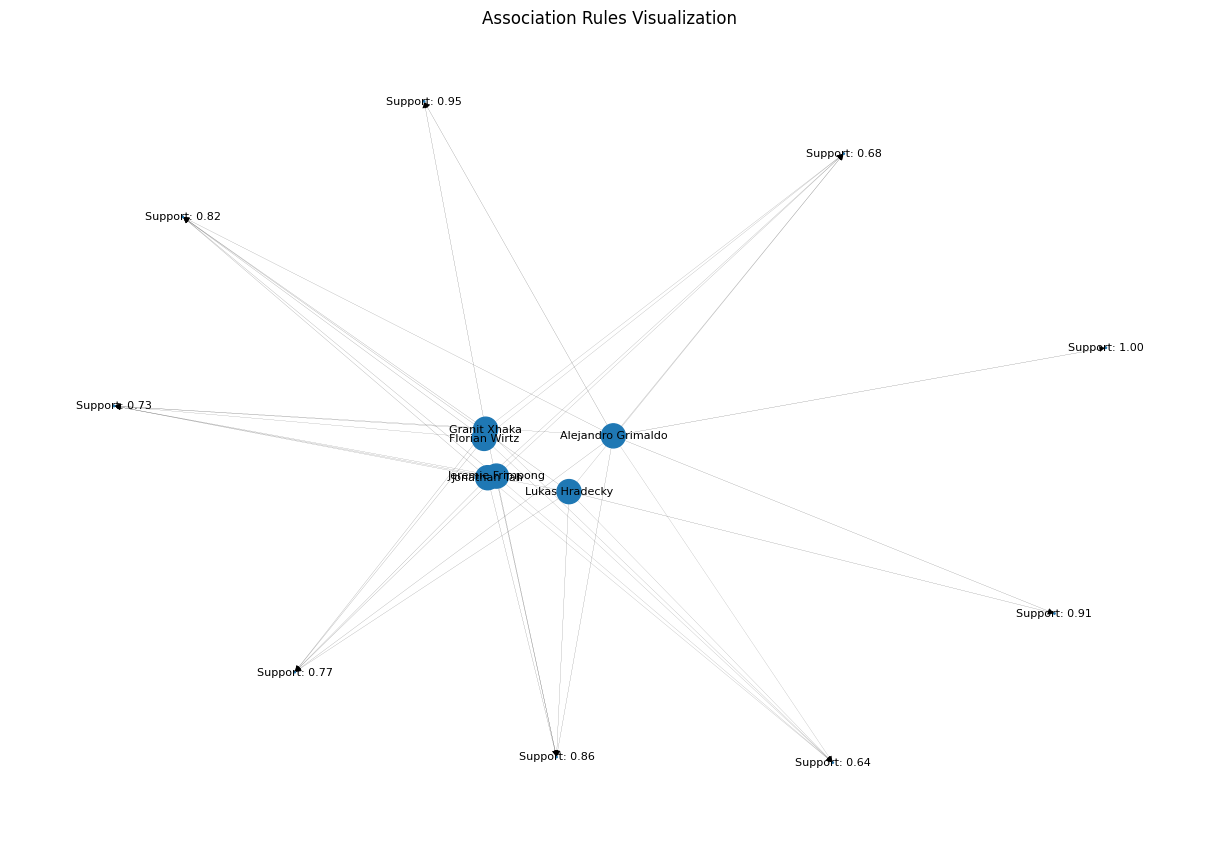

In [130]:
# Association Rules Visualization
# Create a directed graph
G = nx.DiGraph()

# Add nodes for players and association rules
for _, row in frequent_itemsets.iterrows():
    player_set = row['itemsets']
    support = row['support']
    for player in player_set:
        G.add_node(player, size=300)  # Node size based on support
    G.add_node(f"Support: {support:.2f}", size=1)  # Small node for support value
    for player in player_set:
        G.add_edge(player, f"Support: {support:.2f}", weight=support)  # Edge weight based on support

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, font_size=8, node_size=[G.nodes[node]['size'] for node in G.nodes()], width=[0.1 * G.edges[edge]['weight'] for edge in G.edges()])
plt.title('Association Rules Visualization')
plt.show()

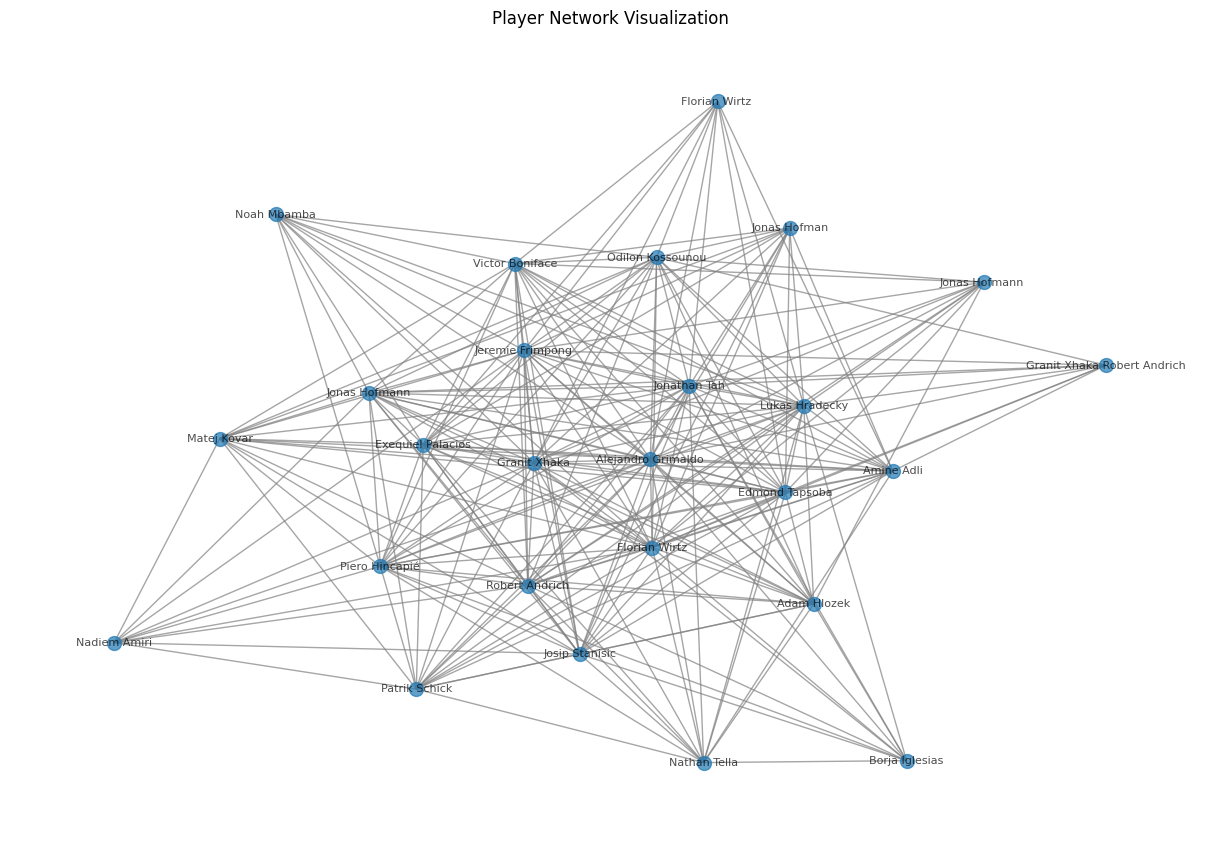

In [131]:
# Player Network Visualization: Create a network graph where nodes represent players,
# and edges represent co-occurrences in the same match. This can help visualize player interactions and partnerships.
# Create an empty graph
G = nx.Graph()

# Add edges between players who appeared in the same match
for _, row in data.iterrows():
    players = row['players']
    for i in range(len(players)):
        for j in range(i+1, len(players)):
            G.add_edge(players[i], players[j])

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, node_size=100, with_labels=True, font_size=8, font_color='black', edge_color='gray', alpha=0.7)
plt.title('Player Network Visualization')
plt.show()